# Chpater3. Classification

## MNIST

In [2]:
from sklearn.datasets import fetch_mldata

In [3]:
mnist = fetch_mldata('MNIST original', data_home = '/Users/dave/data/Hands-on-MachineLearning/datasets/')

In [4]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [6]:
X, y = mnist["data"], mnist["target"]

In [7]:
X.shape, y.shape

((70000, 784), (70000,))

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

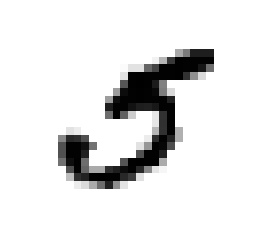

In [9]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")


In [10]:
y[36000]

5.0

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
import numpy as np

In [13]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 3.2 이진 분류기 훈련 
 - 단순히 숫자 하나를 맞나 아니냐를 분류하는 이진 분류기(Binary Classifier)를 개발할 예정.

In [14]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

SkLearn의 SGDClassifier클래스를 사용해 **확률적 경사 하강법(Stochastic Gradient Descent, SGD)**분류기로 시작해보는 것도 나쁘지 않다. 
- 이 분류기는 매우 큰 데이터셋을 호율적으로 처리하는 장점을 가지고 있음. 
- 한번에 하나씩 훈련 샘플을 독리접으로 처리하기 때문에 (온라인 학습에 용이하다.)

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
X_train[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
y_train_5[:5]

array([False, False, False, False, False], dtype=bool)

In [19]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

해당 분류기는 해당 Some_digit 이미지가 5라고 분류했다. 

In [20]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

## 3.3 성능 측정

### 3.3.1 교차 검증(Cross-Validation)을 사용한 정확도 측정 
 - 학습 모델을 평가하는 좋은 방법은 Cross-validation인데 Chapter 2와 동일하게 하는 방법이 좋은 방법이다. 
 - 가끔은 Sk-learn에서 제공하는 것이 많은 제어가 필요할 때가 있다, 이때는 직접 구현하면 된다. 

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [22]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [23]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) # 이미 만들어 놓은 SGD Classifier
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9658
0.96765
0.9699


Cross_val_score() 함수로 폴드가 3개인 K-겹 교차 검증을 사용해 해당 모델을 검증해 볼 것이다. 

In [24]:
from sklearn.model_selection import cross_val_score

In [27]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9658 ,  0.96765,  0.9699 ])

모든 Fold에 대해 정확도(Accuracy)가 95% 이상입니다. 모든 이미지를 5아님 클래스로 분류하는 더미 분류기를 만들어 비교. 

In [28]:
from sklearn.base import BaseEstimator

In [35]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [36]:
never_5_clf = Never5Classifier()

In [38]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy') 
# 그냥 5가 아니라고 만 해도 90%이상 정답이다, 즉, 그냥 5가 아니라 라고만 말해도 된다.

array([ 0.90895,  0.907  ,  0.913  ])

**정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유**를 보여준다. 특히 불균형한 데이터셋을 다룰때 더욱 그렇다.

### 3.3.2 오차 행렬(Confusion Matrix)
 - 분류기의 성능을 조사하는 더 좋은 방법은 Confusion Matrix를 이용하는 것. 
 - 기본 아이디어는 클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것이다. 예) 숫자 5의 이미지를 3으로 잘못 분류한 횟수를 알고싶다면 Confusion Matrix의 5행 3열을 보면 된다. 
 - Confusion Matrix를 만들려면 실제 타깃과 비교할 수 있도록 먼저 예측 값을 만들어야한다. 테스트 세트로 예측을 만들 수 있지만 이것은 출시 전 가장 마지막 단계에 행해야 되는 데이터 이다.
 - **cross_val_predict()**를 이용 할 수 있다.

In [39]:
from sklearn.model_selection import cross_val_predict

In [40]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [42]:
y_train_pred # 점수를 반환하는 것이 아니라 해당 예측 값을 반환 한다. 

array([False, False, False, ..., False, False,  True], dtype=bool)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_train_5, y_train_pred)

array([[53989,   590],
       [ 1343,  4078]])

#### Confusion Matrix의 표현 
| 실제 \ 예측  | Negative | Positive |
| -------- | -------- | -------- |
| Negative | 53989    | 590      |
| Positive | 1343     | 4078     |


 - 행 : 실제 클래스 
 - 열 : 예측 클래스 
 - 표현 (예측, 실제), 예) 원래는 5가 맞지만 5가 아니라고 예측했다면 (False Positive), 5가 맞고 예측도 5가 맞다면 True Positive 
 - 이 행렬의 첫번째 행은 5 아님 이미지 (음성 Negative Class), 53989개를 5 아님으로 정확하게 분류 => True Negative
 - 나머지 590개는 5라고 잘못 분류 (거짓 양성, False Negative)
 - 두번째 행 : 1,343개를 5가 아니라고 예측 (False Positive)  
 - 나머지 4,078개는 정확히 5라고 분류(True Positive)

#### 간결한 표현
 - **Precision**(정밀도) : 양성 예측 정확도 => 예측한 Positive 중에 실제로 Positive 인 비율 => 내가 시험에 찍은 것 중에 얼마나 맞았나.
 
 정밀도 = $\frac{(TP)}{(TP + FP)}$
  - TP : True Positive 진짜 양성의 수
  - FP : False Positive 거짓 양성의 수
  
 - **Recall**(재현율) : 분류기가 정확하게 감지한 양성 샘플의 비율, 민감도(**Sensitivity**) 또는 True Positive Rate(**TPR**)이라고도 한다.
 
 재현율 = $\frac{(TP)}{(TP + FN)}$ => 실제 Positive 중에 예측한 Positive의 비율이 어떻게 되는가 => 암 환자 판별, 실제 암 환자 중에 내가 판별한 환자 수가 얼마나 되는가 ?
 
 - 즉, 찾는 요건에 따라 두개를 어떻게 쓸것인지 무엇이 중요한 것인지 달라 진다. 
 - Pricision과 Recall은 Trade Off 관계에 있다. 하나가 높아지면 하나는 낮아진다. 

### 3.3.3 Precision & Recall 

In [46]:
from sklearn.metrics import precision_score, recall_score

In [49]:
precision_score(y_train_5, y_train_pred) # 5라고 예측한 놈들 중에 실제 5인 놈들은 87% 

0.87360754070265634

In [48]:
recall_score(y_train_5, y_train_pred) # 실제 5 중 5 라고 예측률이 75% 확떨어졌다.

0.75225973067699692

Precision & Recall 을 하나로 만들 점수를 *F1-Score* 이라고한다. 
 - F1 = Precision & Recall의 조화 평균(harmonic mean)

$$F1 = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$$

In [50]:
from sklearn.metrics import f1_score

In [51]:
f1_score(y_train_5, y_train_pred)

0.80840519377539888